In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Fonte dos dados: https://plataforma.brasil.mapbiomas.org/

In [ ]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Configuração das cores para as classes
cores_classes = {
    "1. Floresta": "#1f8d49",
    "2. Vegetação Arbustiva e Herbácea": "#d6bc74",
    "3. Agropecuária": "#ffefc3",
    "4. Área não Vegetada": "#d4271e",
    "5. Corpo D´água": "#2532e4",
}


In [ ]:
# Caminhos dos diretórios
paths = [
    '/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/DADOS/MAPBIOMAS/RANKING_AGRO/*.csv',
    '/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/DADOS/MAPBIOMAS/RANKING_CT/*.csv',
]

In [ ]:
def plot_linhas(filepath, title_prefix):
    """
    Função para gerar o gráfico de linhas para um único arquivo CSV.
    """
    # Carregar o CSV
    df = pd.read_csv(filepath)

    # Selecionar apenas as classes relevantes
    classes_desejadas = [
        "1. Floresta",
        "2. Vegetação Arbustiva e Herbácea",
        "3. Agropecuária",
        "4. Área não Vegetada",
        "5. Corpo D´água"
    ]
    df = df[df['Classe'].isin(classes_desejadas)]

    # Reorganizar o DataFrame, colocando as classes como índice
    df_areas = df.set_index('Classe').T
    df_areas.index = pd.to_numeric(df_areas.index, errors='coerce')  # Converter anos para numérico
    df_areas = df_areas.dropna()  # Remover linhas com valores inválidos

    # Preparar informações do município e título
    municipio = os.path.basename(filepath).replace('MapBiomas_', '').replace('.csv', '').replace('-', ' ')
    title = f"{title_prefix}: {municipio} (MT)"

    # Plotar o gráfico de linhas
    plt.figure(figsize=(12, 6))

    for classe in df_areas.columns:
        plt.plot(df_areas.index, df_areas[classe], label=classe, color=cores_classes.get(classe, "#000000"), marker='o', linestyle='-', linewidth=2)

    plt.title(title, fontsize=14)
    plt.xlabel("Ano", fontsize=12)
    plt.ylabel("Área (ha)", fontsize=12)
    plt.xticks(range(min(df_areas.index), max(df_areas.index) + 1, 5))  # Mostrar label a cada 5 anos
    plt.legend(title="Classe", bbox_to_anchor=(0.5, -0.3), loc='lower center',ncol=5, frameon=False)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

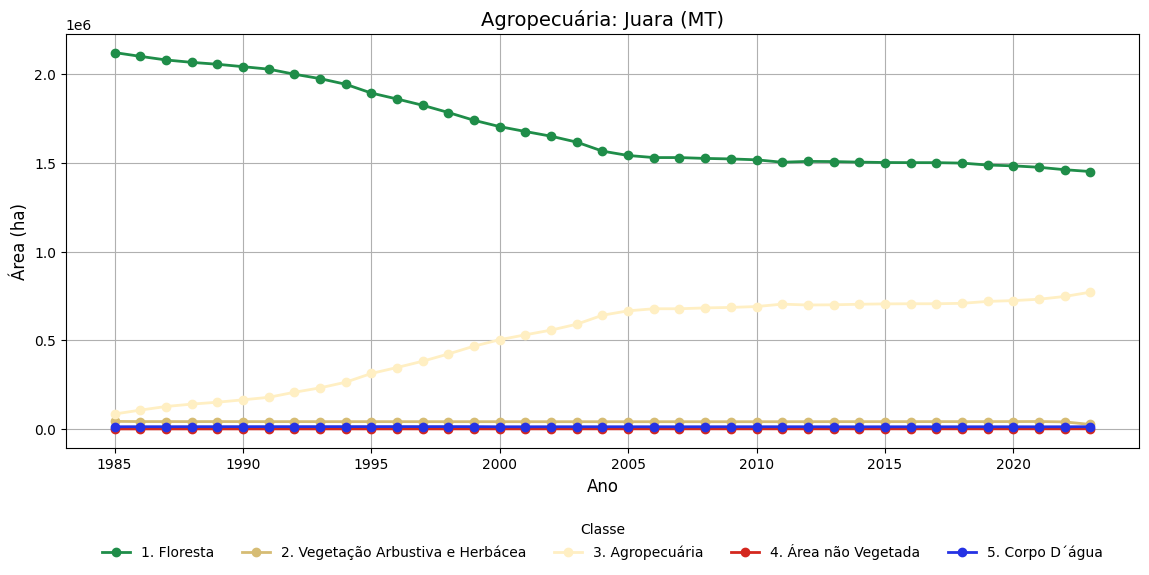

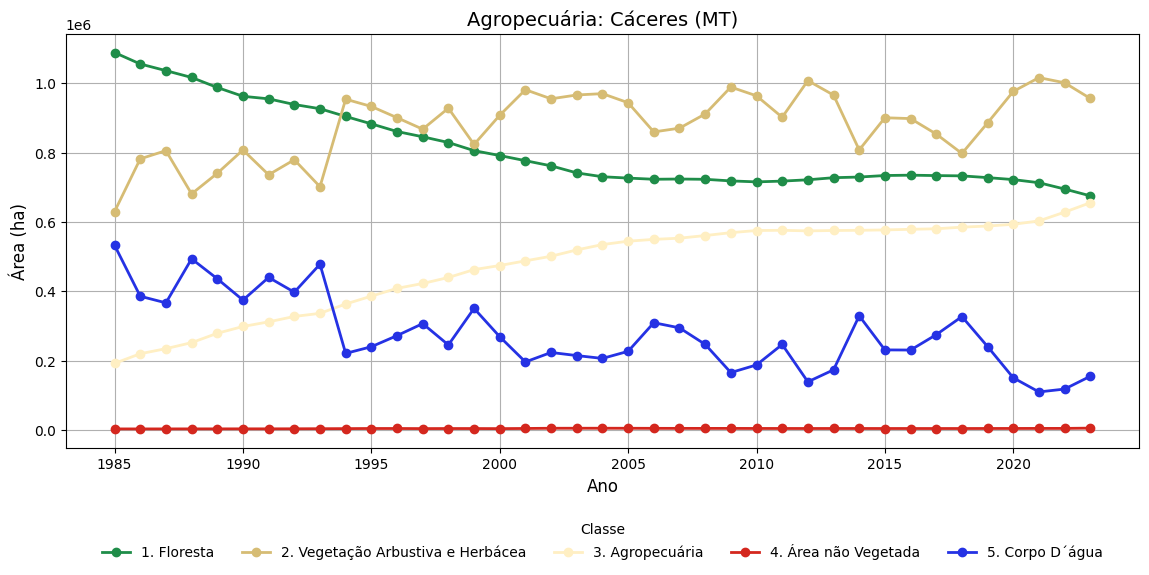

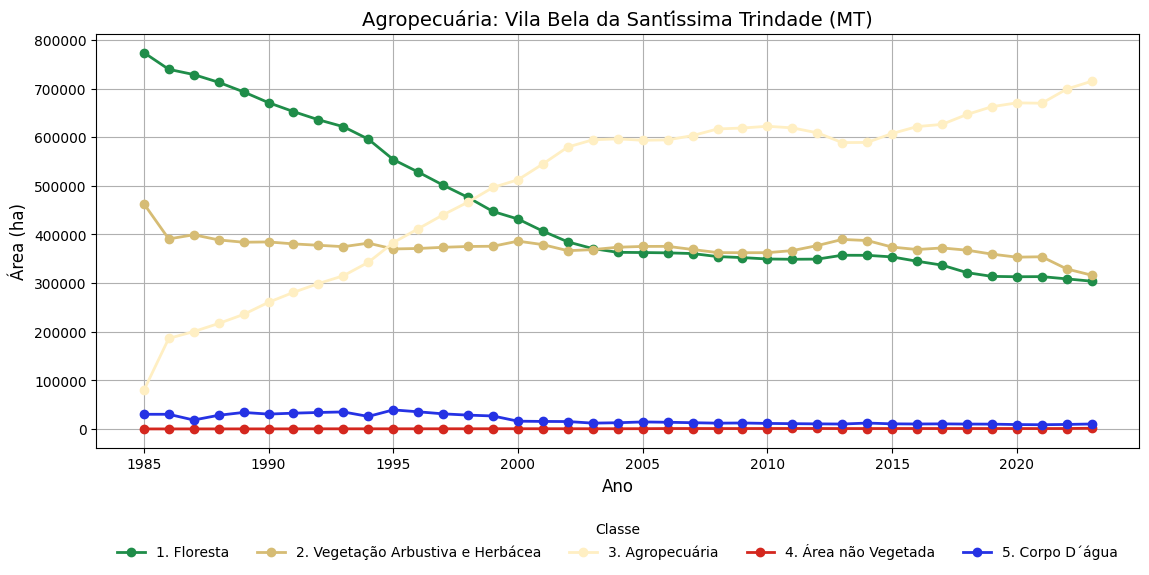

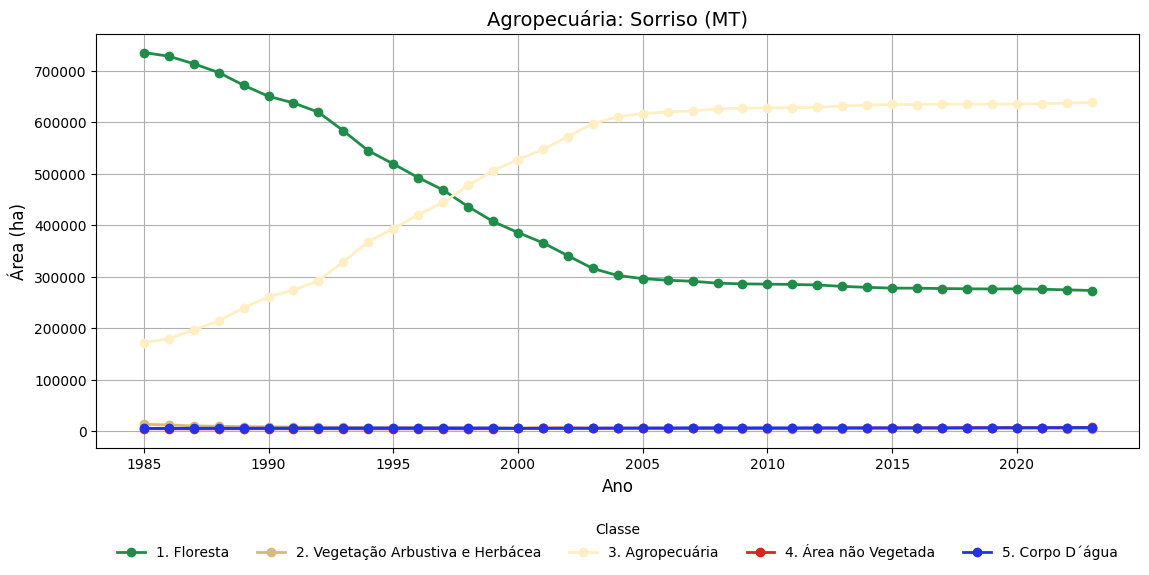

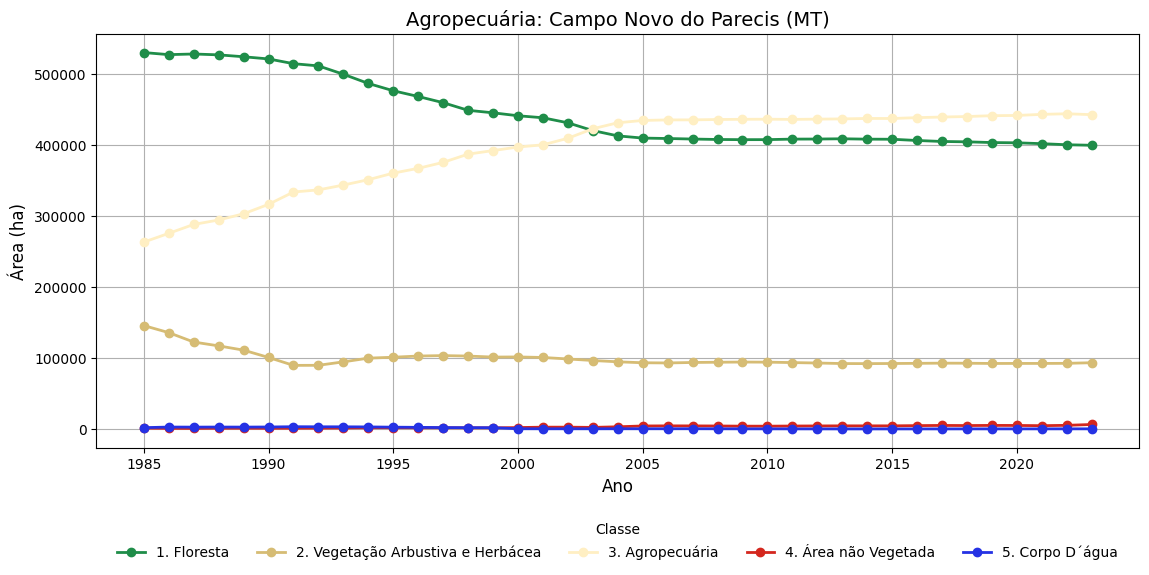

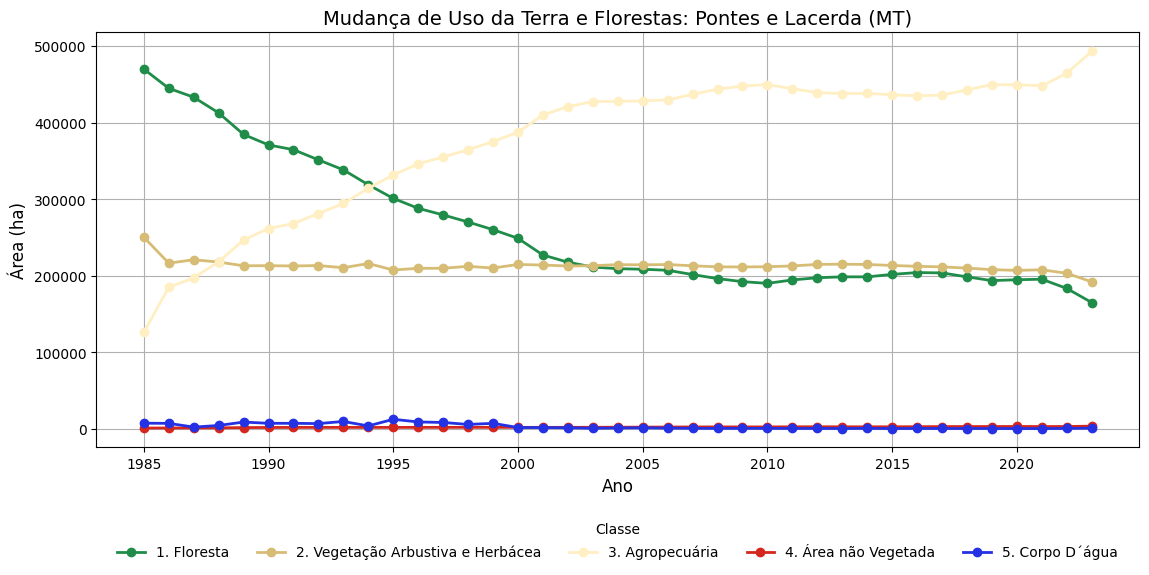

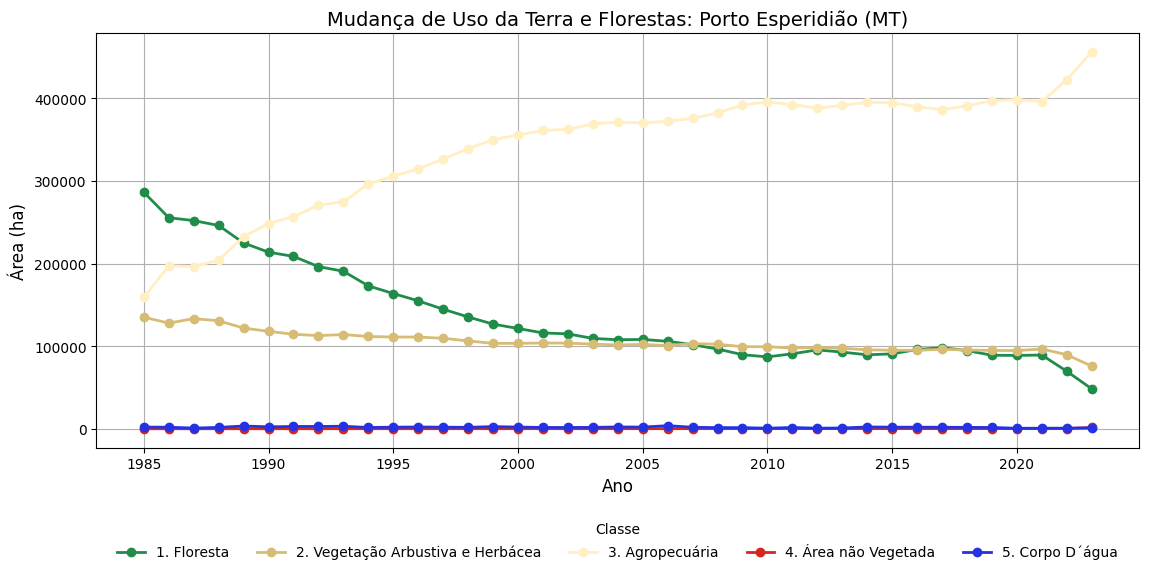

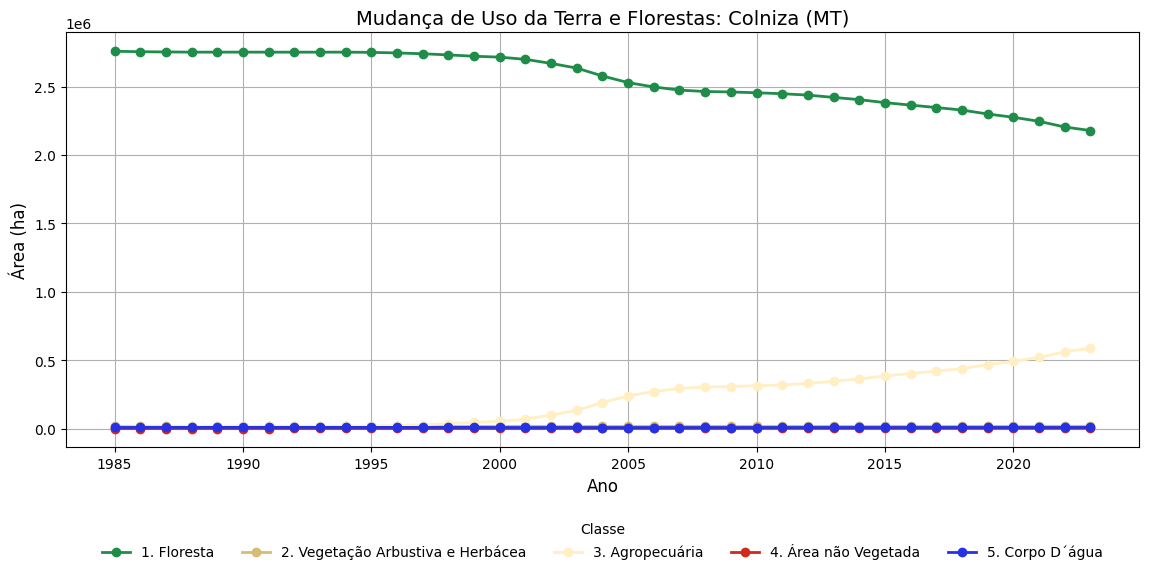

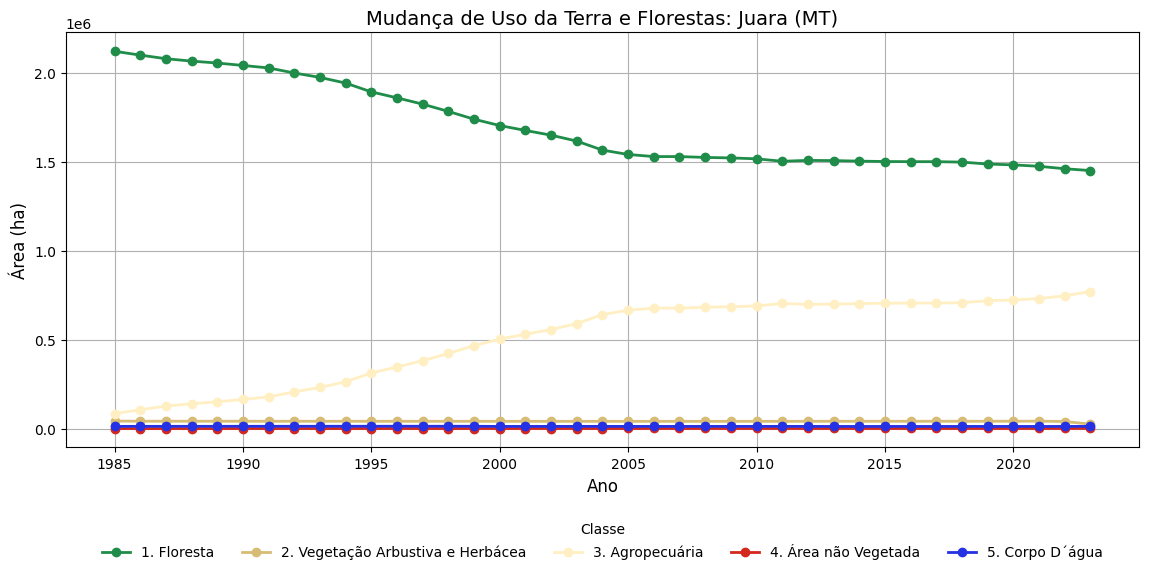

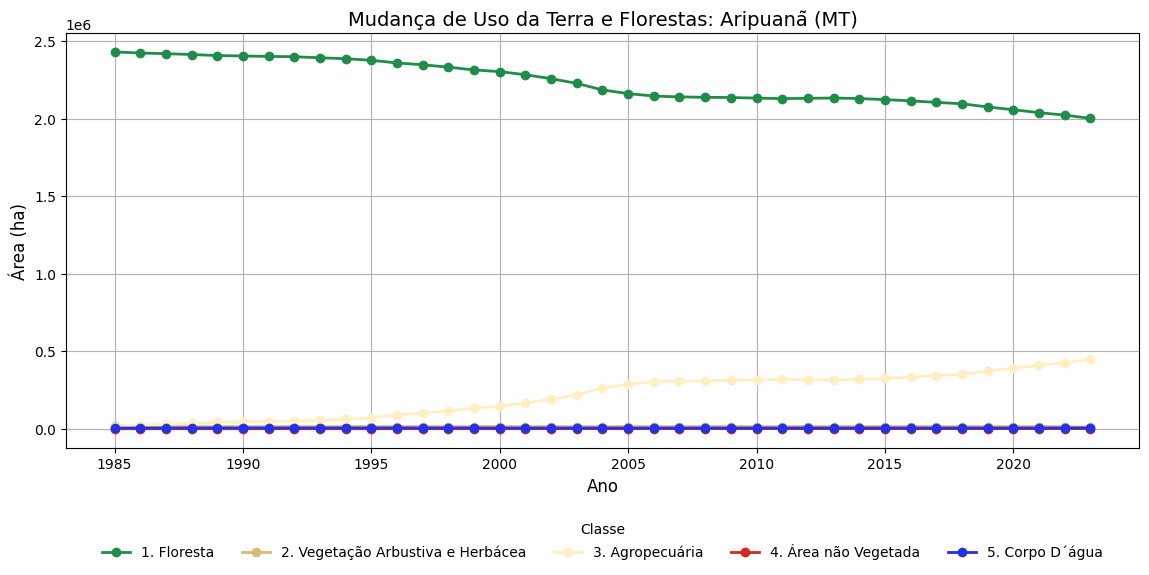

In [ ]:
# Loop por todos os arquivos nos diretórios
for path in paths:
    title_prefix = "Agropecuária" if "AGRO" in path else "Mudança de Uso da Terra e Florestas"
    for filepath in glob.glob(path):
        plot_linhas(filepath, title_prefix)

Análise para o estado do Mato Grosso

In [ ]:
mb_MT = pd.read_csv('/content/drive/MyDrive/PESQUISAS/ENSAIO_MUDANCAS_CLIMATICAS/DADOS/MapBiomas_MT.csv')

In [ ]:
mb_MT.head()

,Classe,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1. Floresta,7.086280e+07,7.007231e+07,6.943220e+07,6.874074e+07,6.791663e+07,6.731289e+07,6.672481e+07,6.585937e+07,6.496356e+07,...,5.005407e+07,4.984171e+07,4.969602e+07,4.953603e+07,4.936967e+07,4.909834e+07,4.888447e+07,4.856131e+07,4.804766e+07,4.745463e+07
1,1.1. Formação Florestal,4.689724e+07,4.651887e+07,4.610208e+07,4.570553e+07,4.526822e+07,4.503788e+07,4.476802e+07,4.433810e+07,4.392778e+07,...,3.413271e+07,3.400448e+07,3.391224e+07,3.379245e+07,3.364109e+07,3.342008e+07,3.326794e+07,3.301654e+07,3.267669e+07,3.231323e+07
2,1.2. Formação Savânica,1.914570e+07,1.877971e+07,1.860204e+07,1.836252e+07,1.803509e+07,1.769750e+07,1.742452e+07,1.705327e+07,1.663180e+07,...,1.242086e+07,1.234132e+07,1.228257e+07,1.224500e+07,1.223450e+07,1.220910e+07,1.215630e+07,1.210107e+07,1.198108e+07,1.176506e+07
3,1.3. Mangue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.4. Floresta Alagável (beta),4.819861e+06,4.773739e+06,4.728076e+06,4.672692e+06,4.613324e+06,4.577508e+06,4.532273e+06,4.467997e+06,4.403978e+06,...,3.500499e+06,3.495918e+06,3.501209e+06,3.498570e+06,3.494082e+06,3.469163e+06,3.460228e+06,3.443694e+06,3.389898e+06,3.376340e+06


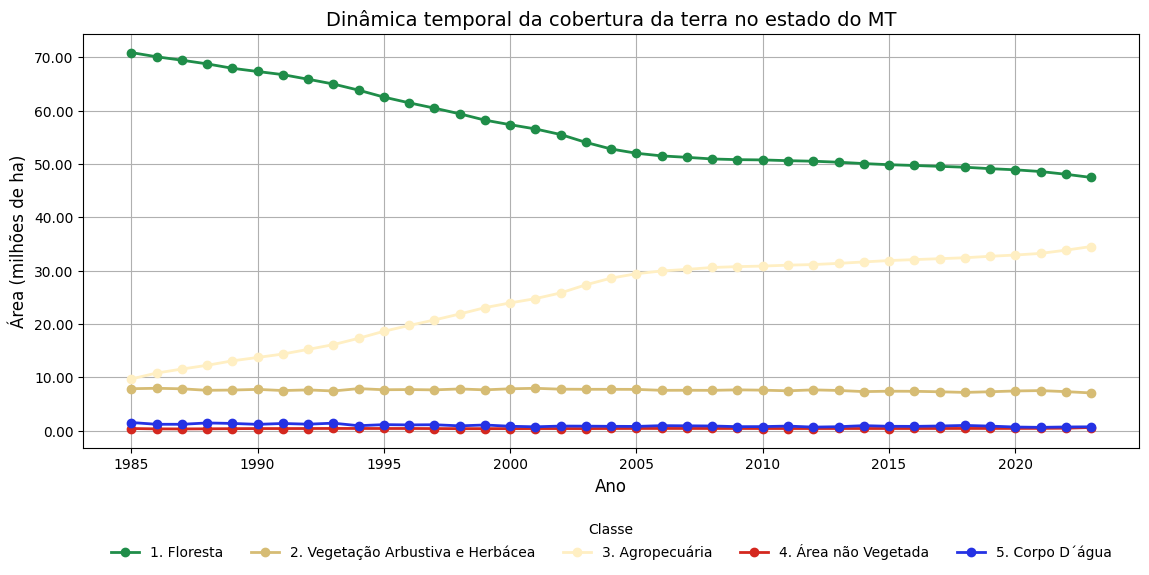

In [ ]:
# Selecionar apenas as classes relevantes
classes_desejadas = [
"1. Floresta",
"2. Vegetação Arbustiva e Herbácea",
"3. Agropecuária",
"4. Área não Vegetada",
"5. Corpo D´água"
]
df_MT =mb_MT[mb_MT['Classe'].isin(classes_desejadas)]



# Reorganizar o DataFrame, colocando as classes como índice
df_areas = df_MT.set_index('Classe').T
df_areas.index = pd.to_numeric(df_areas.index, errors='coerce')  # Converter anos para numérico
df_areas = df_areas.dropna()  # Remover linhas com valores inválidos

title = f'Dinâmica temporal da cobertura da terra no estado do MT'

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for classe in df_areas.columns:
    plt.plot(df_areas.index, df_areas[classe] / 1e6, label=classe, color=cores_classes.get(classe, "#000000"), marker='o', linestyle='-', linewidth=2)

plt.title(title, fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Área (milhões de ha)", fontsize=12)
plt.xticks(range(min(df_areas.index), max(df_areas.index) + 1, 5))  # Mostrar label a cada 5 anos
plt.legend(title="Classe", bbox_to_anchor=(0.5, -0.3), loc='lower center',ncol=5, frameon=False)
plt.grid(True)

# Ajuste para o eixo Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.tight_layout()
plt.show()

In [ ]:
classes_interesse = ['1. Floresta', '3. Agropecuária']
df_classes = mb_MT[mb_MT['Classe'].isin(classes_interesse)]

In [ ]:
# Calcular a variação percentual de ano para ano para cada classe
def calcular_percentual_variacao(df):
    anos = [str(ano) for ano in range(1985, 2024)]  # Anos de 1985 a 2023
    variacoes = []

    for classe in df['Classe'].unique():
        dados_classe = df[df['Classe'] == classe]
        dados_classe = dados_classe[anos]  # Seleciona as colunas dos anos
        variacao_classe = []

        for i in range(1, len(anos)):
            ano_atual = anos[i]
            ano_anterior = anos[i - 1]
            valor_ano_atual = dados_classe[ano_atual].values[0]
            valor_ano_anterior = dados_classe[ano_anterior].values[0]

            if valor_ano_anterior != 0:
                variacao = ((valor_ano_atual - valor_ano_anterior) / valor_ano_anterior) * 100
            else:
                variacao = 0  # Se o valor do ano anterior for 0, não há variação

            variacao_classe.append((classe, ano_atual, variacao))

        # Para 1985, a variação será NaN ou 0
        variacao_classe.insert(0, (classe, '1985', 0))

        variacoes.extend(variacao_classe)

    return pd.DataFrame(variacoes, columns=['Classe', 'Ano', 'Variação'])


In [ ]:
# Calcular a variação
df_variacoes = calcular_percentual_variacao(df_classes)

In [ ]:
# Filtrar para classes '1. Floresta' e '3. Agropecuária'
df_variacoes_filtradas = df_variacoes[df_variacoes['Classe'].isin(classes_interesse)]

Floresta - Variação para 2023: -1.23%
Floresta - Máximo: -0.10% no ano 2010
Floresta - Mínimo: -2.66% no ano 2003
Agropecuária - Variação para 2023: 2.01%
Agropecuária - Máximo: 11.42% no ano 1986
Agropecuária - Mínimo: 0.33% no ano 2010


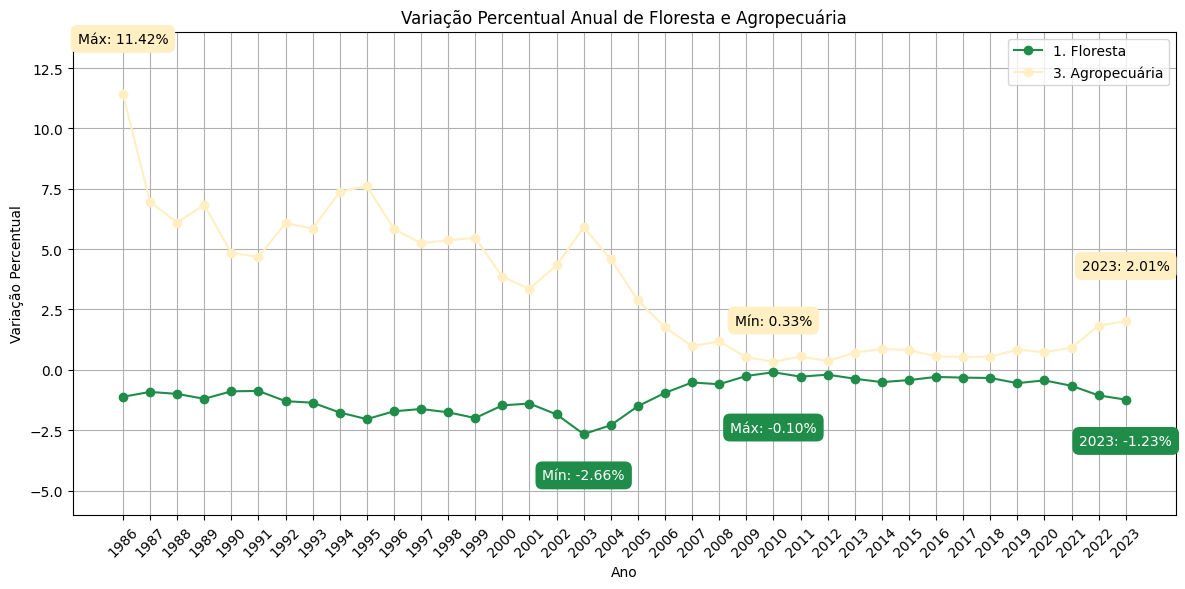

In [ ]:

# Plotar o gráfico
plt.figure(figsize=(12, 6))

for classe in df_variacoes_filtradas['Classe'].unique():
    df_classe = df_variacoes_filtradas[df_variacoes_filtradas['Classe'] == classe]

    # Ignorar 1985 para as operações de máximo e mínimo
    df_classe_ignorando_1985 = df_classe[df_classe['Ano'] != '1985']

    # Definir a cor para cada classe
    if classe == '1. Floresta':
        cor_classe = '#1f8d49'  # Verde para Floresta
    elif classe == '3. Agropecuária':
        cor_classe = '#ffefc3'  # Amarelo claro para Agropecuária

    plt.plot(df_classe_ignorando_1985['Ano'], df_classe_ignorando_1985['Variação'], label=classe, marker='o', color=cor_classe)

    # Destacar o maior e o menor percentual de variação para cada classe
    max_variacao = df_classe_ignorando_1985['Variação'].max()
    min_variacao = df_classe_ignorando_1985['Variação'].min()

    max_ano = df_classe_ignorando_1985[df_classe_ignorando_1985['Variação'] == max_variacao]['Ano'].values[0]
    min_ano = df_classe_ignorando_1985[df_classe_ignorando_1985['Variação'] == min_variacao]['Ano'].values[0]

    # Posição do texto depende da classe
    if classe == '1. Floresta':
        # Para Floresta, o texto de Máximo e Mínimo vai abaixo da curva
        plt.text(max_ano, max_variacao - 2, f'Máx: {max_variacao:.2f}%', color='white', ha='center', va='top', fontsize=10, bbox=dict(facecolor=cor_classe, edgecolor='none', boxstyle='round,pad=0.5'))
        plt.text(min_ano, min_variacao - 2, f'Mín: {min_variacao:.2f}%', color='white', ha='center', va='bottom', fontsize=10, bbox=dict(facecolor=cor_classe, edgecolor='none', boxstyle='round,pad=0.5'))

        # Adicionar o valor de 2023 para Floresta, se disponível
        if '2023' in df_classe_ignorando_1985['Ano'].values:
            variacao_2023 = df_classe_ignorando_1985[df_classe_ignorando_1985['Ano'] == '2023']['Variação'].values[0]
            plt.text('2023', variacao_2023 - 2, f'2023: {variacao_2023:.2f}%', color='white', ha='center', va='bottom', fontsize=10, bbox=dict(facecolor=cor_classe, edgecolor='none', boxstyle='round,pad=0.5'))

            # Imprimir o valor para 2023 para Floresta
            print(f"Floresta - Variação para 2023: {variacao_2023:.2f}%")
        else:
            print(f'Os dados para 2023 não estão disponíveis para a classe Floresta.')

        # Imprimir os valores para Floresta
        print(f"Floresta - Máximo: {max_variacao:.2f}% no ano {max_ano}")
        print(f"Floresta - Mínimo: {min_variacao:.2f}% no ano {min_ano}")
    elif classe == '3. Agropecuária':
        # Para Agropecuária, o texto de Máximo, Mínimo e 2023 vai acima da curva
        plt.text(max_ano, max_variacao + 2, f'Máx: {max_variacao:.2f}%', color='black', ha='center', va='bottom', fontsize=10, bbox=dict(facecolor=cor_classe, edgecolor='none', boxstyle='round,pad=0.5'))
        plt.text(min_ano, min_variacao + 2, f'Mín: {min_variacao:.2f}%', color='black', ha='center', va='top', fontsize=10, bbox=dict(facecolor=cor_classe, edgecolor='none', boxstyle='round,pad=0.5'))

        # Destacar o percentual de variação para 2023, se disponível
        if '2023' in df_classe_ignorando_1985['Ano'].values:
            variacao_2023 = df_classe_ignorando_1985[df_classe_ignorando_1985['Ano'] == '2023']['Variação'].values[0]
            plt.text('2023', variacao_2023 + 2, f'2023: {variacao_2023:.2f}%', color='black', ha='center', va='bottom', fontsize=10, bbox=dict(facecolor=cor_classe, edgecolor='none', boxstyle='round,pad=0.5'))

            # Imprimir o valor para 2023 para Agropecuária
            print(f"Agropecuária - Variação para 2023: {variacao_2023:.2f}%")
        else:
            print(f'Os dados para 2023 não estão disponíveis para a classe Agropecuária.')

        # Imprimir os valores para Agropecuária
        print(f"Agropecuária - Máximo: {max_variacao:.2f}% no ano {max_ano}")
        print(f"Agropecuária - Mínimo: {min_variacao:.2f}% no ano {min_ano}")

# Melhorar visualização do gráfico
plt.title('Variação Percentual Anual de Floresta e Agropecuária')
plt.xlabel('Ano')
plt.ylabel('Variação Percentual')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Ajustar o limite do eixo Y
plt.ylim(bottom=-6)
plt.ylim(top=14)

# Exibir gráfico
plt.tight_layout()
plt.show()